In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Загрузить данные из файла data.csv в объект Pandas**

In [2]:
# Ваш код здесь
data = pd.read_csv('data.csv')

**Данные представлены в виде таблицы. Вывести на печать первые 8 строк:**

In [3]:
# Ваш код здесь
data.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Вывести статистики по датасету

In [4]:
# Ваш код здесь
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Прочитать данные с учетом индекса index_col='PassengerId'

In [5]:
# Ваш код здесь
pd.read_csv('data.csv', index_col='PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


-	PassengerId - идентификатор пассажира
-	Survival - поле в котором указано спасся человек(1) или нет (0)
-	Pclass - содержит социально-экономический статус:  
 1. высокий
 2. средний
 3. низкий

-	Name - имя пассажира
-	Sex - пол пассажира
-	Age - возраст
-	SibSp - содержит информацию о количестве родственников 2-го порядка (муж, жена, братья, сетры)
-	Parch - содержит информацию о количестве родственников на борту 1-го порядка (мать, отец, дети)
-	Ticket - номер билета
-	Fare - цена билета
-	Cabin - каюта
-	Embarked - порт посадки:
 *	C - Cherbourg
 *	Q - Queenstown
 *	S - Southampton


Можно предположить, что чем выше социальный статус, тем больше вероятность спасения. Давайте проверим это взглянув на количество спасшихся и утонувших в зависимости в разрезе классов. Для этого нужно построить следующую сводную таблицу:

<AxesSubplot:xlabel='Pclass'>

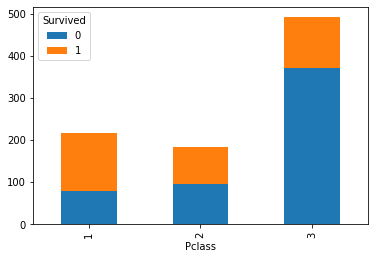

In [6]:
data.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True)

Правда ли то, что чем выше у пассажиров их социальное положение, тем выше их вероятность спасения?


Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

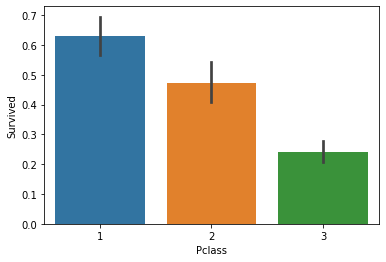

In [7]:
# Ваш код здесь
print(data.groupby('Pclass')['Survived'].value_counts() / data.groupby('Pclass')['Survived'].count())
sns.barplot(x='Pclass', y='Survived', data=data)

Теперь давайте взглянем столбец с номерами кают. Можно ли использовать эти данные.

In [8]:
# Ваш код здесь
print(data['Cabin'])
print()
print(f"NaN in Cabin column: {data['Cabin'].isna().sum()}")

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

NaN in Cabin column: 687


Графически отобразите, как количество родственников влияет на факт спасения:

<AxesSubplot:title={'center':'Parch'}, xlabel='Parch'>

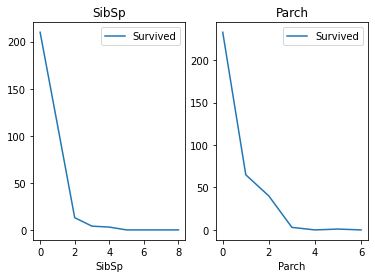

In [9]:
fig, axes = plt.subplots(ncols=2)
data.pivot_table(values='Survived', index='SibSp', aggfunc=np.sum, fill_value=0).plot(ax=axes[0], title='SibSp')
data.pivot_table(values='Survived', index='Parch', aggfunc=np.sum, fill_value=0).plot(ax=axes[1], title='Parch')

Что видно из графиков? Сколько людей имеющих больше 1 родственников спаслись?

In [10]:
# Ваш код здесь
pivot = data.pivot_table(values='Survived', index='SibSp', aggfunc=np.sum, fill_value=0)
pivot['Survived'][2:].sum()

20

Рассмотрите поле Age в котором записан возраст. Посмотрите на сколько оно заполено:

In [11]:
print('всего:', len(data['Age']))
print('пустых значений:', data['Age'].isna().sum())
print('заполнено:', data['Age'].count() / len(data['Age']))

всего: 891
пустых значений: 177
заполнено: 0.8013468013468014


есть ли пустые значения, которые не определены. Если да, то заполните пропуски значением равным медиане по возрату из всей выборки. 

In [12]:
# Ваш код здесь
data['Age'] = data['Age'].fillna(data['Age'].median())

У нас осталось разобраться с полями Ticket, Embarked, Fare, Name. Посмотрите на поле Embarked, в котором находится порт посадки и проверьте есть ли такие пассажиры у которых порт не указан:

In [13]:
# Ваш код здесь
print('пассажиры с неизвестными портами посадки:', data['Embarked'].isna().sum())

пассажиры с неизвестными портами посадки: 2


**Отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 180 у.е. за билет.**


In [14]:
# Ваш код здесь
people_embarked_from_c = data[(data['Embarked'] == 'C') & (data['Fare'] > 180)]
people_embarked_from_c

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
557,558,0,1,"Robbins, Mr. Victor",male,28.0,0,0,PC 17757,227.5250,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C


**Отсортировать этих людей по убыванию платы за билет.**

In [15]:
# Ваш код здесь
people_embarked_from_c.sort_values('Fare', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
557,558,0,1,"Robbins, Mr. Victor",male,28.0,0,0,PC 17757,227.5250,NaN,C
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C


**Пример создания признака.**

In [16]:
def age_category(age):
    '''
    age < 30 -> 1
    30 <= age < 55 -> 2
    age >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [17]:
age_categories = [age_category(age) for age in data['Age']]

In [18]:
data['Age_category'] = age_categories

**Другой способ – через `apply`.**

In [19]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [20]:
# Ваш код здесь
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108
- 112
- 125

In [21]:
# Ваш код здесь
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [22]:
data[data['Sex'] == 'male']['Pclass'].value_counts()

3    347
1    122
2    108
Name: Pclass, dtype: int64

In [23]:
data[data['Sex'] == 'female']['Pclass'].value_counts()

3    144
1     94
2     76
Name: Pclass, dtype: int64

**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [24]:
# Ваш код здесь
round(data['Fare'].median(), 2)

14.45

In [25]:
round(data['Fare'].std(), 2)

49.69

**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [26]:
# Ваш код здесь
young = data[data['Age'] < 30]
old = data[data['Age'] > 60]

In [27]:
print('процент выживших среди людей младше 30:', round(100 * len(young[young['Survived'] == 1]) / len(young), 1))

процент выживших среди людей младше 30: 37.1


In [28]:
print('процент выживших среди людей старше 60:', round(100 * len(old[old['Survived'] == 1]) / len(old), 1))

процент выживших среди людей старше 60: 22.7


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [29]:
# Ваш код здесь
male = data[data['Sex'] == 'male']
female = data[data['Sex'] == 'female']

In [30]:
print('процент выживших среди мужчин:', round(100 * len(male[male['Survived'] == 1]) / len(male), 1))

процент выживших среди мужчин: 18.9


In [31]:
print('процент выживших среди женщин:', round(100 * len(female[female['Survived'] == 1]) / len(female), 1))

процент выживших среди женщин: 74.2


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [32]:
# Ваш код здесь
data['Name'].apply(lambda name: name.split()[2]).mode()[0]

'William'

**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 
- Нет

<AxesSubplot:>

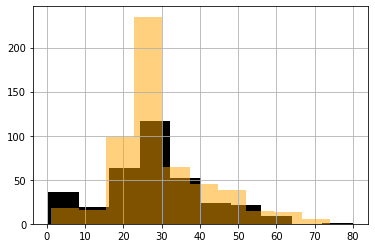

In [33]:
# Ваш код здесь
data[data['Survived'] == 1]['Age'].hist(color='black')
data[data['Survived'] == 0]['Age'].hist(color='orange', alpha=.5)

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [34]:
# Ваш код здесь
pd.crosstab(data['Pclass'], data['Sex'], values=data['Age'], aggfunc=np.mean)

Sex,female,male
Pclass,,
1,33.978723,38.995246
2,28.703947,30.512315
3,23.572917,26.911873
